# Task-2: Wine Quality Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [2]:
wine = pd.read_csv("WineQT.csv")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [9]:
wine.shape

(1143, 13)

In [11]:
#Removing unnecessary columns and copying that dataset into new variable
wine_cp = wine.drop(columns=['Id'])
wine_cp.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

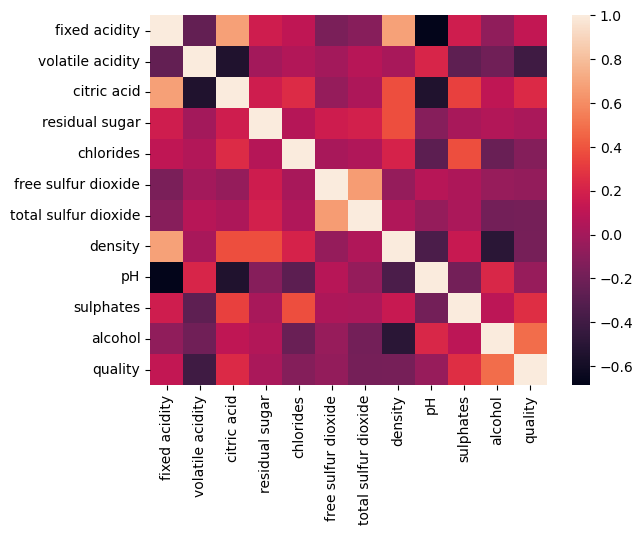

In [12]:
#Finding correlation between then
sns.heatmap(wine_cp.corr())

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_error

# Select the features and target variable
X = wine_cp.drop('quality',axis=1)
y = wine[['quality']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("mean_squared error:",rmse)
print("Mean absolute error:",mae)

Mean Squared Error: 0.3609578821741488
R-squared: 0.3236263739335903
mean_squared error: 0.6007977048675776
Mean absolute error: 0.4657197463411234


In [ ]:
## It is not the best model

In [21]:
wine1 = pd.read_csv("winequality-red.csv")
wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
wine1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_error

# Select the features and target variable
X1 = wine1.drop('quality',axis=1)
y1 = wine1[['quality']]

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=68)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = model.predict(X1_test)

# Evaluate the model
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
mae = mean_absolute_error(y1_test, y1_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("mean_squared error:",rmse)
print("Mean absolute error:",mae)

Mean Squared Error: 0.44499129361079
R-squared: 0.3010214835522558
mean_squared error: 0.6670766774597879
Mean absolute error: 0.5109876963861114


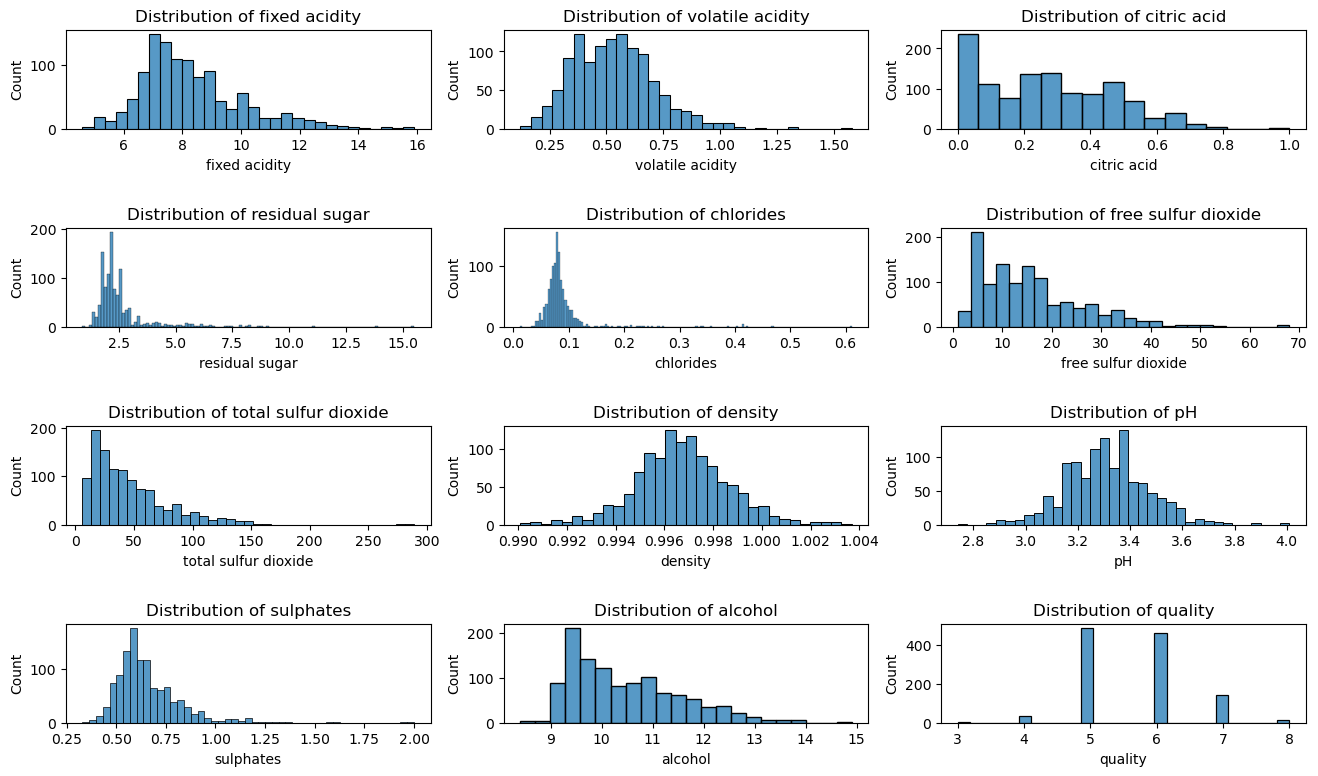

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 9))
plt.subplots_adjust(hspace=1)

for ax, col in zip(axes.flat, wine.columns):
    sns.histplot(data=wine, x=col, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.show()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

X2 = wine.drop('quality',axis=1)
y2 = wine['quality']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=68)

# Create a Random Forest regressor
model = RandomForestRegressor(random_state=42)

# Train the Random Forest regressor on the training data
model.fit(X2_train, y2_train)

# Make predictions on the test data
y2_pred = model.predict(X2_test)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

# Evaluate the Random Forest model
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2_score1 = r2_score(y2_test, y2_pred)

# Print Random Forest results
print("Random Forest Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2_score1}")

(914, 11) (914, 1) (229, 11) (229, 1)
Random Forest Results:
Mean Squared Error (MSE): 0.2976838427947598
Mean Absolute Error (MAE): 0.3970305676855895
R-squared (R2): 0.4421911527192167


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your data loaded into a DataFrame named 'df'
X1 = wine.drop('quality',axis=1)
y1 = wine['quality']

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, test_size=0.02, random_state=42)

# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = model.predict(X3_test)

# Evaluate the model
accuracy = accuracy_score(y3_test, y3_pred)

print("Accuracy:", accuracy*100)

Accuracy: 52.17391304347826


# Gradient Boosting

In [37]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
Xt = wine.drop('quality', axis=1)  # Replace 'TargetColumnName' with the name of your target column
yt = wine['quality']

# Split the data into training and testing sets
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=42)

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgb_regressor.fit(Xt_train, yt_train)

# Make predictions on the test data
yt_pred = xgb_regressor.predict(Xt_test)

# Calculate and print regression metrics
mse = mean_squared_error(yt_test, yt_pred)
rmse = np.sqrt(mse)
r2 = r2_score(yt_test, yt_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.34
Root Mean Squared Error (RMSE): 0.58
R-squared (R2): 0.40


## As we can see we had applied various machine learning algorithms for two type of datasets and almost we get same results for every model we build.

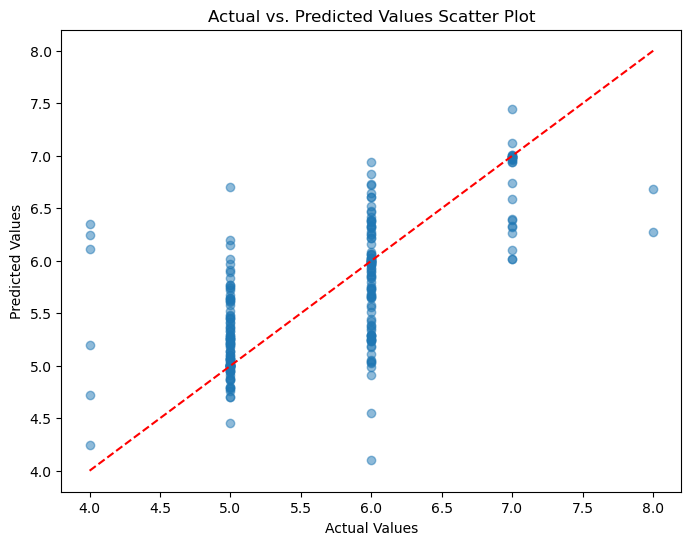

Mean Squared Error (MSE): 0.34


In [38]:
# Create a scatter plot to visualize actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(yt_test, yt_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values Scatter Plot")

# Add a reference line (y=x) for perfect predictions
plt.plot([min(yt_test), max(yt_test)], [min(yt_test), max(yt_test)], color='red', linestyle='--')

# Show the plot
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yt_test, yt_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
